In [53]:
using LinearAlgebra
using Plots
using Distributed; addprocs() # get us some workers
using Dagger
using Zygote

# 1.1

In [23]:
n, m = Int(10e6), 4
A = rand(m, n)
x = rand(n)

10000000-element Vector{Float64}:
 0.9681886268578405
 0.29968139477363365
 0.516814415841179
 0.4816693958468289
 0.17862234809282473
 0.48109633538726904
 0.9223220437369589
 0.7273348956505915
 0.8881521209508095
 0.5904846555427969
 0.3916673129416566
 0.5753369642413777
 0.6116372503625497
 ⋮
 0.7191079583249078
 0.5978351664717628
 0.005965419377837788
 0.2658887713958368
 0.9525872757146794
 0.949033481963802
 0.8165768885214092
 0.5781159746678544
 0.39435842892205764
 0.7821974837225214
 0.06219219076956162
 0.1131485659534811

In [4]:
function subgrad(A, x)
    out = zeros(m)
    for i = 1:m
        out[i] = A[i, :] ⋅ x
    end
    idx = argmax(out)
    return A[idx, :]
end

subgrad (generic function with 2 methods)

In [5]:
function subgrad_dagger(A, x)
    outs = Array{Dagger.Thunk}(undef, m)
    for i in 1:m
      outs[i] = delayed(⋅)(A[i, :], x)
    end

    index = delayed((a...) -> argmax(a))(outs...)
    index = fetch(compute(index))

    a = A[index, :]
end

subgrad_dagger (generic function with 1 method)

In [18]:
function subgrad_vectorized(A, x)
    outs = A*x
    index = argmax(outs)
    return A[index, :]
end

subgrad_vectorized (generic function with 1 method)

In [25]:
num_trials = 100
times = zeros(num_trials)
for i = 1:num_trials
    times[i] = @elapsed subgrad(A,x)
    println("$i $(times[i])")
end

1 0.05022
2 0.051003083
3 0.050179792
4 0.058067333
5 0.0546725
6 0.06415725
7 0.066205833
8 0.059046208
9 0.0467865
10 0.042536541
11 0.040809959
12 0.062260209
13 0.069108959
14 0.053443042
15 0.060586916
16 0.059297541
17 0.058192125
18 0.063912917
19 0.060606083
20 0.059435167
21 0.055505833
22 0.063120292
23 0.062156959
24 0.041361875
25 0.044280375
26 0.053747333
27 0.049594917
28 0.045281084
29 0.040709
30 0.047751584
31 0.051132292
32 0.048741209
33 0.041157917
34 0.055544084
35 0.0656535
36 0.061927875
37 0.072364208
38 0.06381
39 0.066106417
40 0.064889125
41 0.063031125
42 0.052600833
43 0.060037917
44 0.058070958
45 0.062318541
46 0.076945125
47 0.066037792
48 0.071635584
49 0.069607042
50 0.0635295
51 0.054790584
52 0.04918325
53 0.056471959
54 0.053792792
55 0.059801458
56 0.069570833
57 0.061426084
58 0.0464245
59 0.05768075
60 0.053354041
61 0.043424666
62 0.041378458
63 0.0659715
64 0.073174708
65 0.060625125
66 0.067527
67 0.055231333
68 0.055740083
69 0.069221
70 0.0

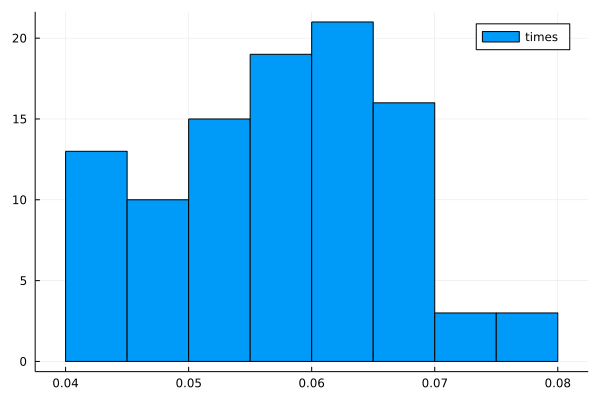

In [28]:
histogram(times, label="times")

In [29]:
num_trials = 100
times = zeros(num_trials)
for i = 1:num_trials
    times[i] = @elapsed subgrad_dagger(A,x)
    println("$i $(times[i])")
end

1 0.197541208
2 0.14770525
3 0.174400959
4 0.171123625
5 0.171519792
6 0.165319958
7 0.154489334
8 0.17827525
9 0.18504675
10 0.258610875
11 0.176901417
12 0.171258667
13 0.175135791
14 0.157680584
15 0.161527208
16 0.173502375
17 0.24578425
18 0.171215084
19 0.206424834
20 0.206690416
21 0.165217875
22 0.175119
23 0.170609917
24 0.183032375
25 0.231278667
26 0.169997417
27 0.174102542
28 0.172119542
29 0.169741292
30 0.161656917
31 0.215930042
32 0.175818084
33 0.164528291
34 0.16735575
35 0.156504708
36 0.166509584
37 0.217130916
38 0.164985417
39 0.162976542
40 0.16321625
41 0.167028209
42 0.184377291
43 0.179709666
44 0.169433625
45 0.173414208
46 0.17081225
47 0.172096958
48 0.169480125
49 0.170113333
50 0.176178458
51 0.166757708
52 0.176885708
53 0.188888833
54 0.176857875
55 0.170732708
56 0.170048167
57 0.1681435
58 0.174215666
59 0.203135708
60 0.171101583
61 0.169583125
62 0.185220583
63 0.240880709
64 0.156391875
65 0.170666166
66 0.169230125
67 0.168216792
68 0.158764042
6

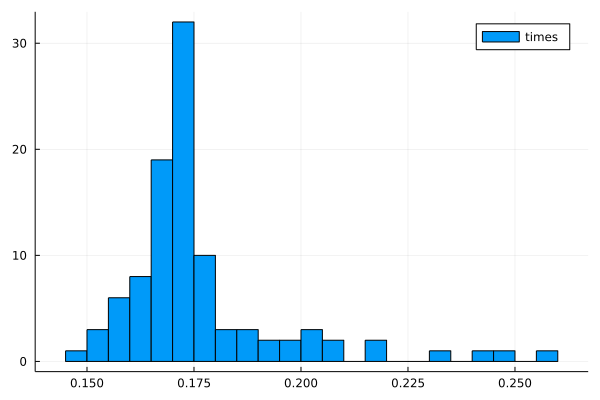

In [30]:
histogram(times, label="times")

In [31]:
num_trials = 100
times = zeros(num_trials)
for i = 1:num_trials
    times[i] = @elapsed subgrad_vectorized(A,x)
    println("$i $(times[i])")
end

1 0.109327875
2 0.023165375
3 0.023017417
4 0.0231855
5 0.023071
6 0.023076125
7 0.023159125
8 0.023294
9 0.023060792
10 0.023165
11 0.023178375
12 0.023250583
13 0.024827541
14 0.024766292
15 0.025647083
16 0.025037
17 0.025211541
18 0.024832041
19 0.027358459
20 0.024920334
21 0.025553042
22 0.024658167
23 0.023697917
24 0.023933875
25 0.023521791
26 0.023261792
27 0.023197583
28 0.023310292
29 0.023251459
30 0.023416125
31 0.023602583
32 0.023474
33 0.023688667
34 0.0233275
35 0.023090375
36 0.023210083
37 0.024626541
38 0.023365584
39 0.023148833
40 0.023219042
41 0.023156916
42 0.023119
43 0.023275833
44 0.023557292
45 0.023677291
46 0.024047166
47 0.023926209
48 0.023644958
49 0.023743958
50 0.024157542
51 0.023984667
52 0.023663125
53 0.023284083
54 0.023105791
55 0.023122333
56 0.02331375
57 0.023296083
58 0.023319458
59 0.023114167
60 0.023167125
61 0.0231525
62 0.023417625
63 0.023174667
64 0.023128083
65 0.0235465
66 0.02309625
67 0.023279875
68 0.023063791
69 0.023235584
70

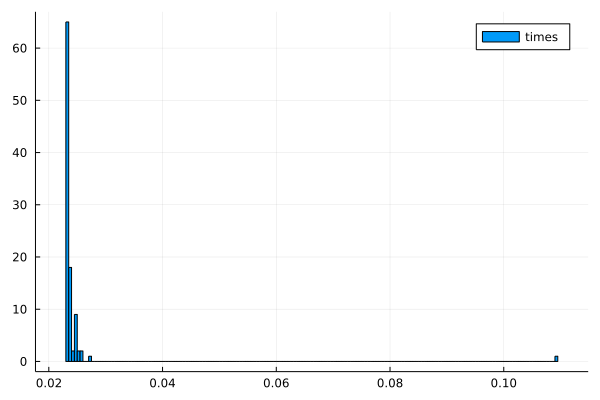

In [32]:
histogram(times, label="times")

In [47]:
outs = Array{Dagger.Thunk}(undef, m)
for i in 1:m
  outs[i] = delayed(⋅)(A[i, :], x)
end

index = delayed((a...) -> argmax(a))(outs...)

Thunk[1280](#9, (Thunk[1276](dot, ([0.053448004069541866, 0.7102570534913983, 0.15744718084693488, 0.712859925290332, 0.06291869319968868, 0.5069163137966322, 0.391047940455287, 0.22436152933758757, 0.18375635266589663, 0.7662959516107587  …  0.1644431160682528, 0.016436270882846937, 0.8238681301863444, 0.6729860146552075, 0.28756145424216184, 0.8931263532346891, 0.3511357580542809, 0.8036127044995063, 0.5363329215231333, 0.6320483171840606], [0.9681886268578405, 0.29968139477363365, 0.516814415841179, 0.4816693958468289, 0.17862234809282473, 0.48109633538726904, 0.9223220437369589, 0.7273348956505915, 0.8881521209508095, 0.5904846555427969  …  0.005965419377837788, 0.2658887713958368, 0.9525872757146794, 0.949033481963802, 0.8165768885214092, 0.5781159746678544, 0.39435842892205764, 0.7821974837225214, 0.06219219076956162, 0.1131485659534811])), Thunk[1277](dot, ([0.7228450509723289, 0.36318271807746705, 0.8283713877967871, 0.950879433183186, 0.42385485316863425, 0.9919478144213315, 0

In [48]:
    context = Context(;log_sink=Dagger.LocalEventLog(), log_file="test.dot")
collect(context, index)

3

# 1.2

In [54]:
f(x) = max(x,0)^2
f'(0)

0.0

In [55]:
f(x) = min(x,0) + max(x,0)
f'(0), f'(1e-50), f'(1e-30)

(1.0, 1.0, 1.0)

In [56]:
f(x) = min(abs(x), x)
f'(0)

0.0

In [57]:
f(x) = min(x, abs(x))
f'(0)

1.0